#### Home Assignment 4 - SVM

**Task 1 - SVM Quad/Dual Program**

In [1]:
# import for Task 1
import numpy as np
import qpsolvers as qps
import matplotlib.pyplot as plt
import os
import sys
# Redirect the warning output to the null device
sys.stderr = open(os.devnull, 'w')

In [2]:
def plotSVM(X,y,w=None,pieces:int=100, space:float=1,support_vectors:list=None,title:str=None,pltAxis=plt):
    
    # classification to Red and Blue
    red = np.where(y <= 0)
    blue = np.where(y > 0)
    
    # Show the points on the graph
    pltAxis.plot(X[red, 0], X[red, 1],'o', color='red')
    pltAxis.plot(X[blue, 0], X[blue, 1], 'o', color='blue')
    
    # Find Min and Max for define plot sizes
    x_min = np.amin(X[:, 0])
    x_max = np.amax(X[:, 0])
    y_min = np.amin(X[:, 1])
    y_max = np.amax(X[:, 1])
    
    pltAxis.axis([x_min-1, x_max+1, y_min-1, y_max+1]) # set size of axis
    lx = np.linspace(x_min, x_max, pieces)
    
    if(w is not None): # Create SVM visualization
        ly = [(-w[-1] - w[0] * p) / w[1] for p in lx] # Black line seperator
        ly1 = [(-w[-1] - w[0] * p - space) / w[1] for p in lx] # Support line Red
        ly2 = [(-w[-1] - w[0] * p + space) / w[1] for p in lx] # Support line Blue
        # Ploting Vectors
        pltAxis.plot(lx, ly, color='black')
        pltAxis.plot(lx, ly1, "--", color='red')
        pltAxis.plot(lx, ly2, "--", color='blue')
    
    if(support_vectors is not None):
        pltAxis.scatter(X[support_vectors,0], X[support_vectors,1], s=150, linewidth=2, facecolors='none', edgecolors='k')
    if(pltAxis == plt):
        pltAxis.title(title)
        pltAxis.show()
    else:
        pltAxis.set_title(title)

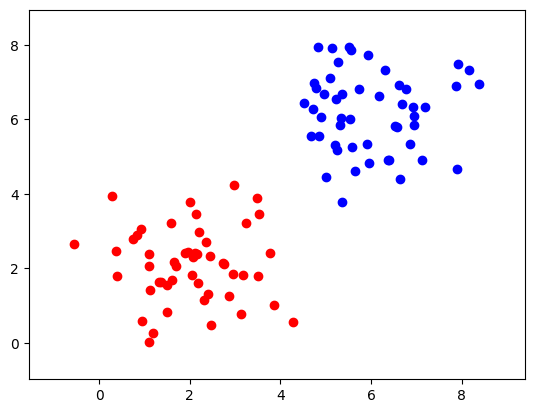

In [3]:
# Loading Database and split
dataset = np.genfromtxt("simple_classification.csv",delimiter=",",skip_header=1)  # read the CSV file "simple_regression.csv" and make it np.array with skipping header
X = dataset[:,:-1] 
y = dataset[:,-1]
y = np.where(y<=0,-1,1)
plotSVM(X,y) # plot the graph of points without SVM

##### Task 1a - Quadratic Programming SVM

In [4]:
# Task 1a - Quadratic programming
def QuadSVM(X,y,max_iter=5000):
    N, n = X.shape
    X = np.c_[X, np.ones(N)]
    P = np.eye(n+1)
    q = np.zeros(n+1)
    G = -np.diag(y) @ X
    h = -np.ones(X.shape[0])
    w = qps.solve_qp(P, q, G, h, solver='osqp',max_iter=max_iter)
    return w

Vector w from Quadratic program SVM is
[ 1.19553571  0.34700045 -6.52243901]
Plot of Quadratic programming SVM


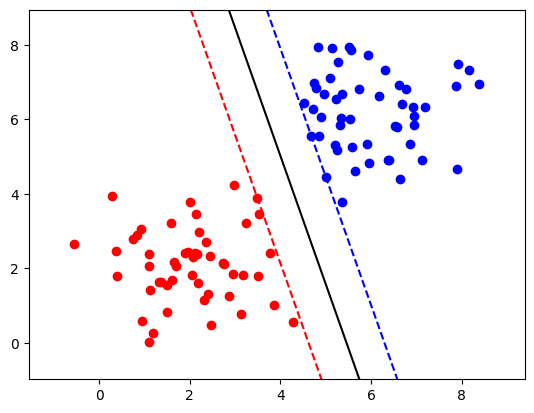

In [5]:
w_quad = QuadSVM(X,y)
print(f"Vector w from Quadratic program SVM is\n{w_quad}")
print("Plot of Quadratic programming SVM")
plotSVM(X,y,w_quad)

##### Task 1b - Dual Programming SVM

In [6]:
# Task 1b - Dual Programming SVM
def DualSVM(X,y,threshold=0.01,max_iter=1000):
    X = np.c_[X,np.ones(X.shape[0])]
    N, _ = X.shape
    G = np.diag(y) @ X
    P = 0.5 * G @ G.T
    q = -np.ones(N)
    GG = -np.eye(N)
    h = np.zeros(N)
    
    alpha = qps.solve_qp(P, q, GG, h, solver='osqp',max_iter=max_iter)
    w = 0.5 * G.T @ alpha
    
    support_vectors_idx = np.where(np.abs(alpha) >= threshold)[0] # Identify support vectors
    return w, alpha, support_vectors_idx


Vectors:

Vector w from Dual Program SVM is
[ 1.18637982  0.35081171 -6.50029701]

Vector alpha from Dual Program SVM is
[-9.77519521e-04 -4.39850134e-03 -1.18819216e-03  1.57605690e-03
  3.21073175e-04  9.64378728e-04  7.47703469e-03  1.49805349e-03
  1.06425185e-02 -2.29334579e-02 -1.38597442e-03 -1.24892486e-02
 -7.12111987e-04 -1.38940772e-03 -1.05996741e-03 -7.07258795e-03
  1.65694320e-03 -9.06673838e-06 -1.49110104e-03  4.82318510e-04
  1.57011585e-03  1.44397402e-02 -4.50376122e-03  1.31791506e-02
 -1.66174932e-03  1.62004197e-02 -1.13989872e-02  1.87476442e-02
 -2.07632498e-02 -4.50081803e-03  8.88743970e-04  2.12097352e-02
  3.49338491e-03 -4.17910588e-03 -3.07626836e-04  1.02521420e+01
  2.25138585e-03  2.81546713e-02  2.21772830e-03 -1.62900764e-03
 -4.06465053e-02 -3.54135058e-03  2.73942100e+01 -1.10910844e-03
  8.15404581e-04 -4.20196114e-03  5.06193042e+01  9.42788828e-03
 -9.04922584e-03 -2.86941676e-03 -4.57874321e-03  2.30912865e-02
 -2.33373733e-05  7.68972293e-03 

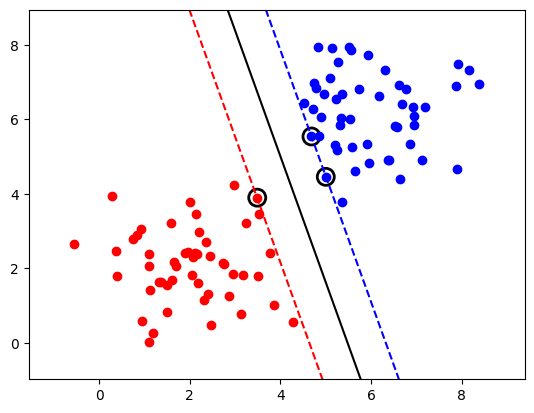

In [7]:
threshold = 0.1 # Selected because we want small support vectors but we don't want values too close to zero
w_dual, alpha, support_vectors_idx = DualSVM(X,y, threshold=threshold)
support_vectors = np.where(abs(alpha) >= threshold, abs(alpha),0)
print("\nVectors:\n")
print(f"Vector w from Dual Program SVM is\n{w_dual}\n")
print(f"Vector alpha from Dual Program SVM is\n{alpha}\n")
print(f"Support Vectors from Dual Program SVM is\n{support_vectors}\n")
print("Plot of Quadratic Programming SVM")
plotSVM(X, y, w_dual,support_vectors=support_vectors_idx)

**Task 2 - SVM Dual Program with Kernel**

In [8]:
# import for Task 2
import pandas as pd
import numpy as np
import qpsolvers as qps
import itertools
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import sys
sys.stderr = open(os.devnull, 'w') # Remove warnings

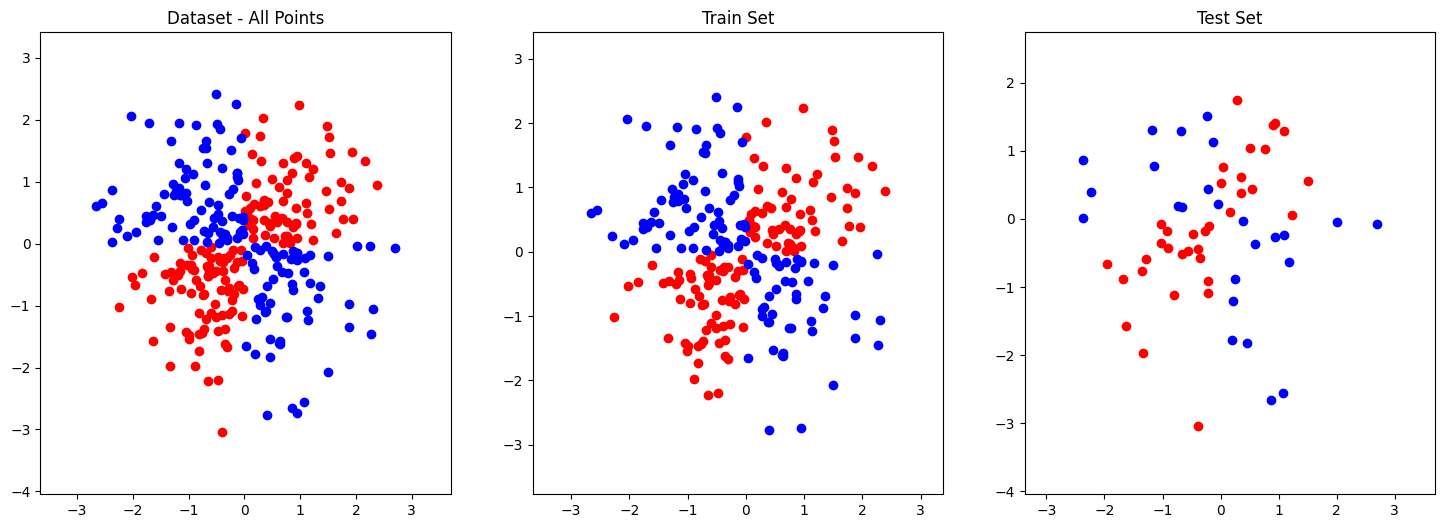

In [9]:
# Loading Database and split
dataset = np.genfromtxt("simple_nonlin_classification.csv",delimiter=",",skip_header=1)  # read the CSV file "simple_regression.csv" and make it np.array with skipping header
X = dataset[:,:-1] # take the samples
y = dataset[:,-1] # take the labels
y = np.where(y<=0,-1,1) # convert labels format to 1 or -1
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=0.8,shuffle=False) # split the dataset for train and test
# plot the graph of points without SVM for each set
fig, axis = plt.subplots(1, 3,figsize=(18,6))
fig.subplots_adjust(wspace=0.2)
plotSVM(X,y,title='Dataset - All Points',pltAxis=axis[0]) 
plotSVM(X_trn,y_trn,title='Train Set',pltAxis=axis[1])
plotSVM(X_tst,y_tst,title='Test Set',pltAxis=axis[2])
plt.show()

In [10]:
# Kernel Functions

def polynomial_kernel(x, y, gamma:float=1.0, degree:int=2.0):
    return (gamma * np.dot(x, y.T) + 1) ** degree

def RBF_kernel(x, y, gamma:float=1.0):
    return np.e**(-gamma * np.linalg.norm(x - y))

In [11]:
def plot_classifier_kernel(alpha, X_trn, y_trn, ker, *args:float,X_tst=None,y_tst=None, s_point=None,s_circule=20,threshold=0.01,title:str=None,pltAxis=plt,hide_train=False,hide_sv=False):
    x_min = np.amin(X_trn[:, 0])
    x_max = np.amax(X_trn[:, 0])
    y_min = np.amin(X_trn[:, 1])
    y_max = np.amax(X_trn[:, 1])
    
    pltAxis.axis([x_min-0.1, x_max+0.1, y_min-0.1, y_max+0.1])
    xx = np.linspace(x_min, x_max)
    yy = np.linspace(y_min, y_max)
    
    xx, yy = np.meshgrid(xx, yy)
    
    N, n = X_trn.shape
    z = np.zeros(xx.shape)
    for i, j in itertools.product(range(xx.shape[0]), range(xx.shape[1])):
        z[i, j] = sum([y_trn[k]*alpha[k]*ker(X_trn[k,:], np.array([xx[i,j],yy[i,j]]), *args) for k in range(N)])
    
    pltAxis.contour(xx, yy, z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['--','-', '--'])
    if hide_sv == False:
        sv = np.argwhere(abs(alpha) >= threshold).reshape(-1)
        pltAxis.scatter(X_trn[sv, 0], X_trn[sv, 1], c=y_trn[sv], s=s_point, cmap=matplotlib.colors.ListedColormap(['blue','red']))
        pltAxis.scatter(X_trn[sv,0], X_trn[sv,1], s=s_circule, linewidth=0.5, facecolors='none', edgecolors='k')     
    if hide_train == False:
        nsv = np.argwhere(abs(alpha) < threshold).reshape(-1)
        pltAxis.scatter(X_trn[nsv, 0], X_trn[nsv, 1], c=y_trn[nsv], s=s_point, alpha=0.6, cmap=matplotlib.colors.ListedColormap(['blue','red']))
    if X_tst is not None and y_tst is not None:
        pltAxis.scatter(X_tst[:, 0], X_tst[:, 1], c=y_tst, s=s_point, cmap=matplotlib.colors.ListedColormap(['darkblue','darkred']))
    if(pltAxis == plt):
        pltAxis.title(title)
        pltAxis.show()
    else:
        pltAxis.set_title(title)

In [12]:
def svm_dual_kernel(X, y, ker, *args:float, max_iter=1000):
    N, n = X.shape
    P = np.empty((N, N))
    for i, j in itertools.product(range(N), range(N)):
        P[i, j] = y[i] * y[j] * ker(X[i,:], X[j,:], *args)
    P = 0.5*(P+P.T)
    P = 0.5*P
    q = -np.ones(N)
    GG = -np.eye(N)
    h = np.zeros(N)
    alpha = qps.solve_qp(P, q, GG, h, solver='osqp', max_iter=max_iter)
    return alpha

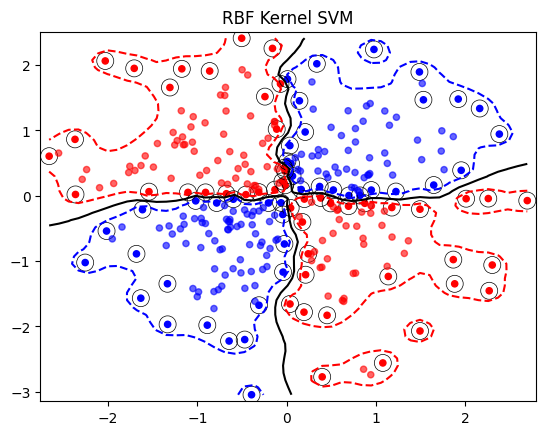

In [13]:
# RBF Kernel for ALL Dataset - Example
gamma = 5
alpha = svm_dual_kernel(X, y, RBF_kernel, gamma)
plot_classifier_kernel(alpha, X, y, RBF_kernel, gamma, s_point=20,s_circule=150,threshold=0.95,title='RBF Kernel SVM')

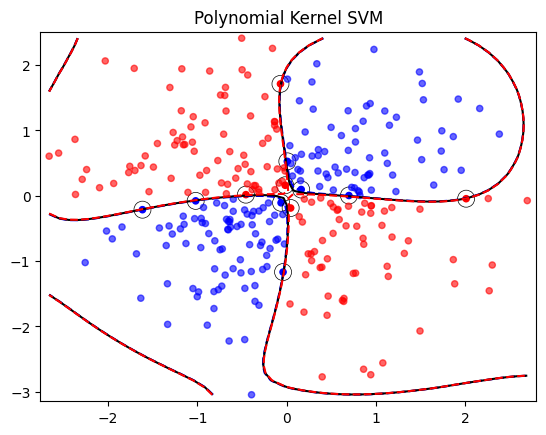

In [14]:
# Polynomial Kernel for ALL Dataset - Example
gamma, degree = 0.5 ,5
alpha = svm_dual_kernel(X, y, polynomial_kernel, gamma, degree)
plot_classifier_kernel(alpha, X, y, polynomial_kernel, gamma, degree, s_point=20,s_circule=150,threshold=0.90,title='Polynomial Kernel SVM')

In [15]:
def predict_labels(alpha, X_train, y_train, X_tst, ker, *args:float):
    x = X_tst[:,0]
    y = X_tst[:,1]
    N, n = X_train.shape
    z = np.zeros(x.shape)
    for i in range(x.shape[0]):
        z[i] = sum([y_train[k]*alpha[k]*ker(X_train[k,:], X_tst[i,:].T, *args) for k in range(N)])
    return np.sign(z)

In [16]:
# Grid Search for gamma value - RBF Kernel
gamma_list = [1e-5,1e-4,1e-3,1e-2,1e-1,1,2,5,10,20,30,50]
threshold = 0.9
scores = {} # key = ("Kernel",gamma,degree), value = accuacy_score
for gamma in gamma_list:
    key = ("RBF Kernel", gamma, None)
    try:
        alpha = svm_dual_kernel(X_trn, y_trn, RBF_kernel, gamma)
        predicted_labels = predict_labels(alpha, X_trn,y_trn, X_tst, RBF_kernel, gamma)
        score = accuracy_score(y_tst,predicted_labels)
        scores[key] = score
        print(f'{key} : {score}')
    except:
        continue
    
# Grid Search for gamma and degrees values - Polynomial Kernel
degree_list = [2,3,4,6,8]
for gamma  in gamma_list:
    for degree in degree_list:
        key = ("Polynomial Kernel", gamma, degree)
        try:
            alpha = svm_dual_kernel(X_trn, y_trn, polynomial_kernel, gamma, degree)
            predicted_labels = predict_labels(alpha, X_trn,y_trn, X_tst, polynomial_kernel, gamma, degree)
            score = accuracy_score(y_tst,predicted_labels)
            scores[key] = score
            print(f'{key} : {score}')
        except:
            continue
        
    

('RBF Kernel', 1e-05, None) : 0.9666666666666667
('RBF Kernel', 0.0001, None) : 0.9666666666666667
('RBF Kernel', 0.001, None) : 0.9666666666666667
('RBF Kernel', 0.01, None) : 0.9666666666666667
('RBF Kernel', 0.1, None) : 0.9666666666666667
('RBF Kernel', 1, None) : 0.9833333333333333
('RBF Kernel', 2, None) : 0.9833333333333333
('RBF Kernel', 5, None) : 0.9833333333333333
('RBF Kernel', 10, None) : 0.9833333333333333
('RBF Kernel', 20, None) : 0.9833333333333333
('RBF Kernel', 30, None) : 0.9833333333333333
('RBF Kernel', 50, None) : 0.9666666666666667
('Polynomial Kernel', 0.1, 4) : 0.9833333333333333
('Polynomial Kernel', 0.1, 6) : 0.95
('Polynomial Kernel', 0.1, 8) : 0.95
('Polynomial Kernel', 1, 2) : 0.9666666666666667
('Polynomial Kernel', 1, 3) : 0.9833333333333333
('Polynomial Kernel', 1, 4) : 0.95
('Polynomial Kernel', 1, 6) : 0.9333333333333333
('Polynomial Kernel', 1, 8) : 0.9333333333333333
('Polynomial Kernel', 2, 2) : 0.9666666666666667
('Polynomial Kernel', 2, 3) : 0.9

Plot the results to analyze


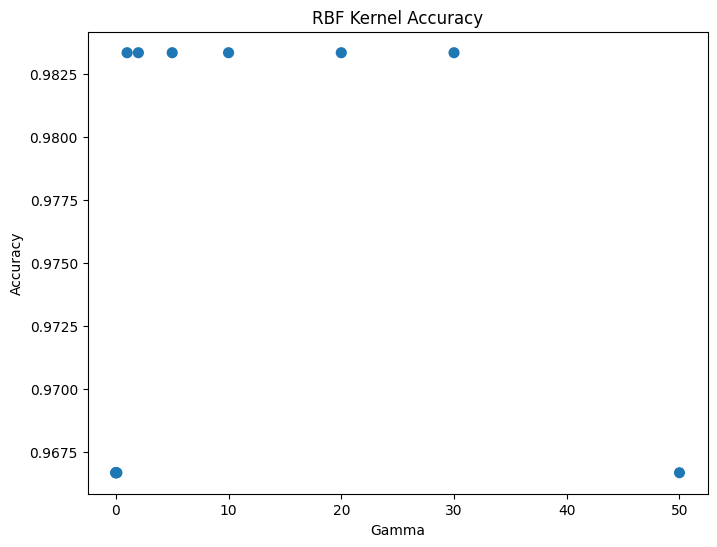

The Top 7 Scores In RBF Kernel:



,index,Accuracy,Kernel,Gamma
0,10,0.983333,RBF Kernel,30.0
1,9,0.983333,RBF Kernel,20.0
2,8,0.983333,RBF Kernel,10.0
3,7,0.983333,RBF Kernel,5.0
4,6,0.983333,RBF Kernel,2.0
5,5,0.983333,RBF Kernel,1.0
6,11,0.966667,RBF Kernel,50.0


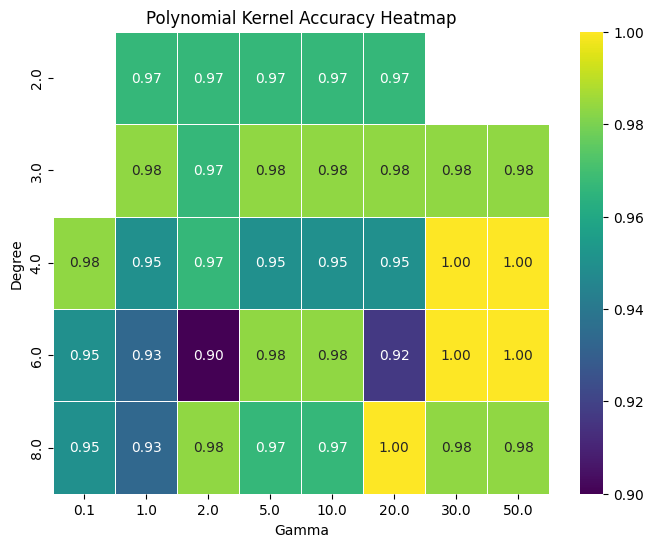

The Top 10 Scores In Polynomial Kernel:



,Accuracy,Kernel,Gamma,Degree
typing.Literal[<no_default>],,,,
39,1.000000,Polynomial Kernel,20.0,8.0
46,1.000000,Polynomial Kernel,50.0,6.0
42,1.000000,Polynomial Kernel,30.0,6.0
45,1.000000,Polynomial Kernel,50.0,4.0
41,1.000000,Polynomial Kernel,30.0,4.0
47,0.983333,Polynomial Kernel,50.0,8.0
43,0.983333,Polynomial Kernel,30.0,8.0
24,0.983333,Polynomial Kernel,2.0,8.0
33,0.983333,Polynomial Kernel,10.0,6.0


In [17]:
# Plot the results for analyze

# Settings
k_rbf = 7 # top k highest scores for RBF
k_poly = 10 # top k highest scores for Poly

# Create a DataFrame from the dictionary
data = pd.DataFrame(scores.values(), index=scores.keys(), columns=['Accuracy'])
data[['Kernel', 'Gamma', 'Degree']] = pd.DataFrame(data.index.tolist(), index=data.index)
data = data.reset_index(drop=True)
rbf_data = data[data['Kernel'] == 'RBF Kernel'].drop(columns=['Degree']) # DF for RBF
poly_data = data[data['Kernel'] == 'Polynomial Kernel'] # DF for Poly

# -------------- RBF Kernel --------------
# Create a 2D scatter plot for RBF Kernel
plt.figure(figsize=(8,6))
plt.scatter(rbf_data['Gamma'], rbf_data['Accuracy'], s=50 * rbf_data['Accuracy']) # point is bigger as accuracy is higher
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('RBF Kernel Accuracy')
plt.show()
# Get the idx of the top 10 highest scores in Poly Kernel
top_idx = rbf_data['Accuracy'].nlargest(k_rbf).index
print(f'The Top {k_rbf} Scores In RBF Kernel:\n')
display(rbf_data.sort_values(by=['Accuracy','Gamma'],ascending=False).reset_index().head(k_rbf)) # show the top K accuracy for RBF kernel
# -------------- RBF Kernel End --------------


# ----------- Polynomial Kernel -----------
# Create a pivot table of scores
heatmap_data = poly_data.pivot(index='Degree', columns='Gamma', values='Accuracy')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", cbar=True, linewidths=0.5)
plt.xlabel('Gamma')
plt.ylabel('Degree')
plt.title('Polynomial Kernel Accuracy Heatmap')
plt.show()

print(f'The Top {k_poly} Scores In Polynomial Kernel:\n')
display(poly_data.sort_values(by=['Accuracy','Degree','Gamma'],ascending=False).head(k_poly)) # show the top K accuracy for Poly kernel
# -------------- Polynomial Kernel End --------------

**Graph Colors**
##### Light Blue and Red is Train set
##### Dark Blue and Red is Test set

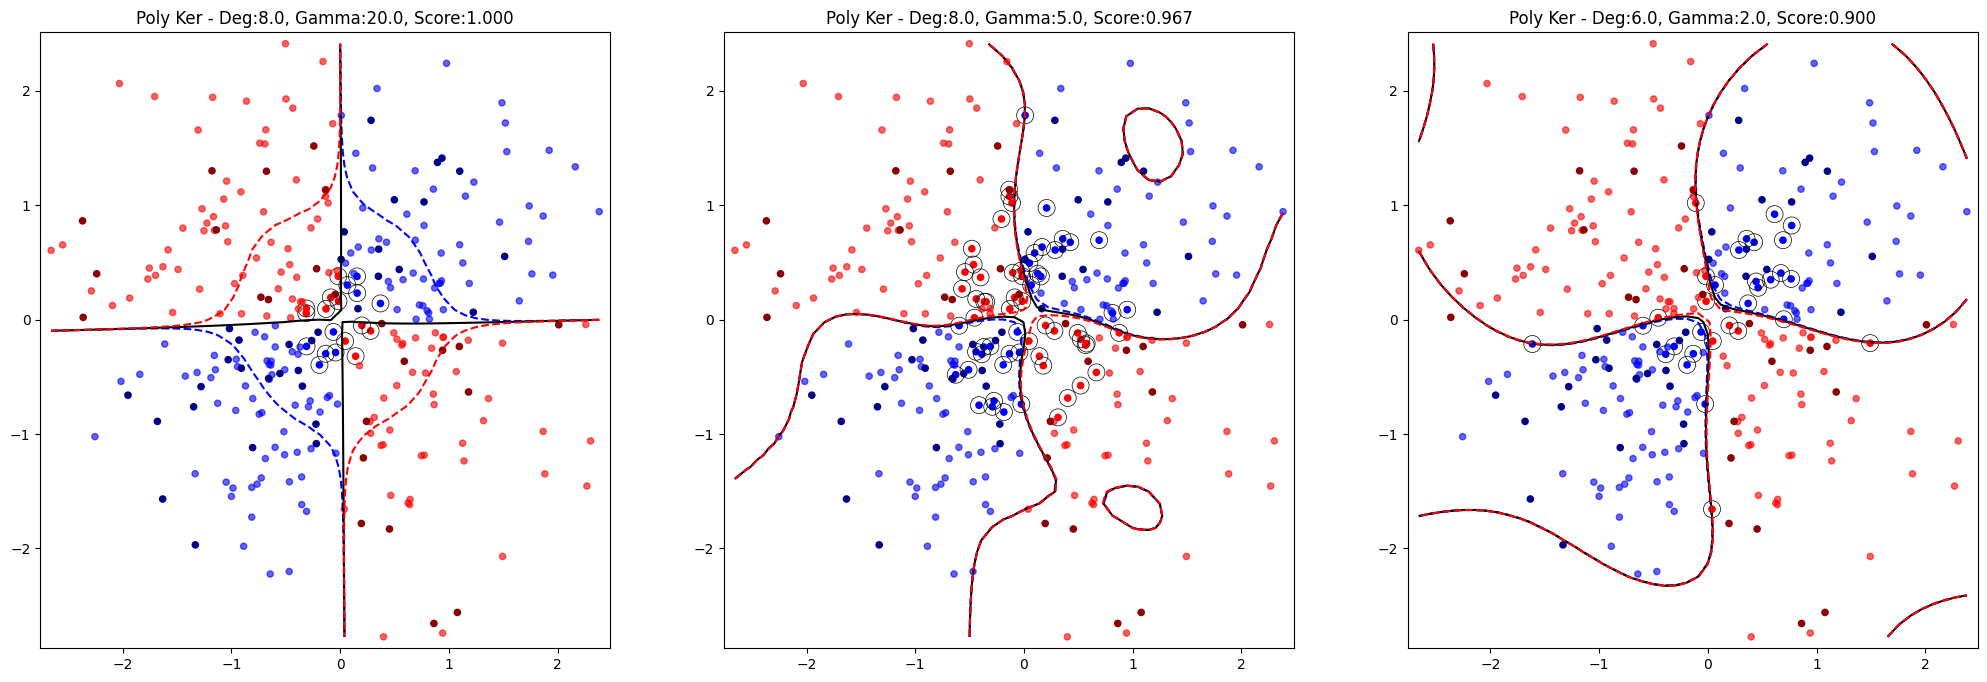

In [18]:
# Plot 3 Different parameters for polynomial kernel

def plotting_wrapper_poly(row,axis,k=15):
    degree = row['Degree']
    gamma = row['Gamma']
    score = row['Accuracy']
    alpha = svm_dual_kernel(X_trn, y_trn, polynomial_kernel, gamma, degree)
    top_indices = np.argsort(alpha)[-k:] # sort the values and take top k alphas
    lowest_top_values = alpha[top_indices][1] # lowest value in the top K
    plot_classifier_kernel(alpha, X_trn, y_trn, polynomial_kernel, gamma, degree,
                           X_tst=X_tst,y_tst=y_tst, s_point=20,s_circule=150,threshold=lowest_top_values,
                           title=f'Poly Ker - Deg:{degree}, Gamma:{gamma}, Score:{score:.3f}',
                           pltAxis=axis)


K_plots = 3  # set number of samples
k_sv = 20 # show the most 20 significant sv
num_rows = len(poly_data) # Get the number of rows in the DataFrame
middle_index = num_rows // 2  # Floor division to get the middle index
end_index = num_rows - 1  # Index of the last row

thresholds = [1,1e-07,1e-16] # threshold for most

# Select the desired rows
selected_rows = poly_data.sort_values(by=['Accuracy','Degree','Gamma'],ascending=False).iloc[[0,middle_index, end_index]].reset_index()

fig, axis = plt.subplots(1, K_plots, figsize=(25, 8))  # create sub plots
fig.subplots_adjust(wspace=0.2)
for idx, row in selected_rows.iterrows():
    plotting_wrapper_poly(row, axis[idx],k=k_sv)

plt.show()

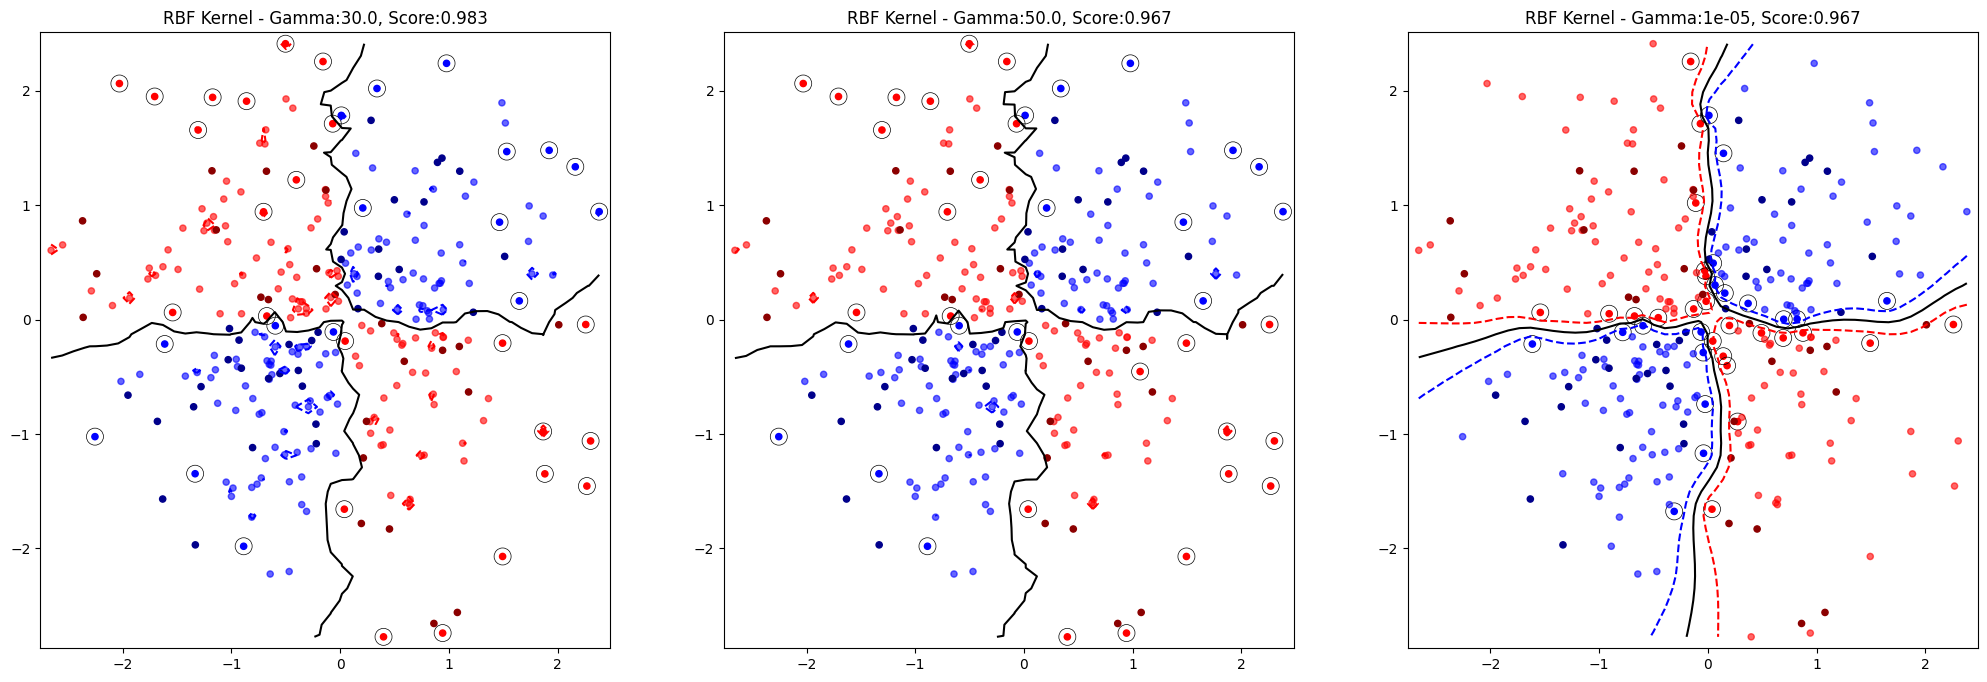

In [19]:
# Plot 3 Different parameters for polynomial kernel - Show K support vectors

def plotting_wrapper_rbf(row,axis,k=15):
    gamma = row['Gamma']
    score = row['Accuracy']
    alpha = svm_dual_kernel(X_trn, y_trn, RBF_kernel, gamma)
    top_indices = np.argsort(alpha)[-k:] # sort the values and take top k alphas
    lowest_top_values = alpha[top_indices][1] # lowest value in the top K
    plot_classifier_kernel(alpha, X_trn, y_trn, RBF_kernel, gamma,
                           X_tst=X_tst,y_tst=y_tst, s_point=20,s_circule=150,threshold=lowest_top_values,
                           title=f'RBF Kernel - Gamma:{gamma}, Score:{score:.3f}',
                           pltAxis=axis)


K_plots = 3  # set number of samples
k_sv = 40 # show the most 20 significant sv

# pick up 3 samples from results first middle last

num_rows = len(rbf_data) # Get the number of rows in the DataFrame
middle_index = num_rows // 2  # Floor division to get the middle index
end_index = num_rows - 1  # Index of the last row

thresholds = [1,1e-07,1e-16] # threshold for most

# Select the desired rows
selected_rows = rbf_data.sort_values(by=['Accuracy','Gamma'],ascending=False).iloc[[0,middle_index, end_index]].reset_index()

fig, axis = plt.subplots(1, K_plots, figsize=(25, 8))  # create sub plots
fig.subplots_adjust(wspace=0.2)
for idx, row in selected_rows.iterrows():
    plotting_wrapper_rbf(row, axis[idx],k_sv)

plt.show()

**Conclusion:**
- RBF Kernel:
    - We can learn from the graph that Gamma value isn't really matter in this dataset for the tested range and the accuracy are very high in the tested range
    - In different shuffled run we saw from the table that the highest score is usually for low gamma while gamma become bigger it is look like score start decrease 
    - We can learn from this data that RBF Kernel provide great prediction for the dataset with or without shuffle and most of the values in the range was great.

- Polynomial Kernel:
    - It can be learned from the table that the degree value is not a particularly significant factor on the accuracy of the model,
    in these cases a too low degree (2, 3 degrees) and for some gammas the model fail.
    - It can be seen that as the gamma value increases, the results of the accuracy of the prediction improve up to very high accuracy.
    In addition we see that 3-4 degree provide the best results for most of the gammas
    - In the table you can clearly see that there are different successful combinations so there are not a clear patterns for good score.
    but there are many great combinations.

From the information we have seen here it can be assumed that a polynomial kernel is probably more appropriate, but RBF can provide great results as well

**Note:**
Because we used grid search for find the hyper parameters for wide scale of values
the Hyperparameters might be overfitted to the dataset.
In order to avoid this, we can also to do croos validation for better matching hyperparameters as well

**Task 3 - Implement SVM Model with Kernel**

In [20]:
import numpy as np
import qpsolvers as qps
import itertools

In [21]:
# Task 3 - Implement SVM Model with Kernel
class SVM:
    
    def __init__(self, kernel='rbf', degree:int=3, C:float=1.0, gamma='scale'):
        # initialize C
        self._C = self.__set_C(C)
        # initialize degree
        self._degree = self.__set_degree(degree)
        # initialize gamma
        self._gamma = self.__set_gamma(gamma)
        # initialize kernel
        self._kernel = self.__kernel_set(kernel)
        
        # initialize rest of parameter to None
        self._weights = None
        self._alpha = None
        self._Xtrain = None
        self._Ytrain = None
    
    
    # Kernel static methods
    @staticmethod
    def polynomial_kernel(x, y, gamma:float=1.0, degree:int=2.0):
        return (gamma * np.dot(x, y.T) + 1) ** degree
    
    @staticmethod
    def RBF_kernel(x, y, gamma:float=1.0):
        return np.e**(-(x - y).T @ (x - y))
    
    @staticmethod
    def linear_kernel(x,y):
        return np.dot(x,y)
    
    @staticmethod
    def sigmoid_kernel(x, y, gamma):
        if(None in [type(x),type(y),type(gamma)]):
            print(type(x),type(y),type(gamma))
        return np.tanh(gamma * np.dot(x, y.T))
    
    # Parameters method
    def __kernel_parameters_pack(self):
        if self._kernel == self.RBF_kernel:
            return self._gamma
        
        if self._kernel == self.sigmoid_kernel:
            return self._gamma
        
        if self._kernel == self.polynomial_kernel:
            return self._gamma, self._degree
            
    # Kernel Set method
    def __kernel_set(self, kernel):
        self.__unidentified_kernel = False
        if kernel == 'rbf':
            return self.RBF_kernel
        
        if kernel == 'poly':
            return self.polynomial_kernel
        
        if kernel == 'linear':
            return self.linear_kernel
        
        if kernel == 'sigmoid':
            return self.sigmoid_kernel

        if isinstance(kernel, str):
            raise ValueError("kernel name is not reconized.")
        
        if callable(kernel):  # check for kernel function called
            print("unidentified kernel, Parameters degree and gamma are disabled")
            self.__unidentified_kernel = True
            return kernel
        else:
            raise TypeError("kernel is not reconized.")
        
    def __set_gamma(self, gamma):
        # Error handle
        if gamma not in ['scale', 'auto'] and (not isinstance(gamma, (float,int)) or gamma <= 0):
            raise ValueError("gamma must be a positive float or one of ['scale', 'auto'].")       
        return gamma 
        
    def __set_degree(self, degree):
        if degree <= 0:
            raise ValueError("degree must be a positive integer.")
        return degree
        
    def __set_C(self, C):
        if C <= 0:
            raise ValueError("C must be a positive number.")
        return C
        
    def __update_gamma(self):
        if isinstance(self._gamma, int):
            return
        if self._gamma == 'scale':
            self._gamma = 1 / (self.__n_features * self.__Xtrn.var())
        if self._gamma == 'auto':
            self._gamma = 1 / self.__n_features
            
    def fit(self, X, y, max_iter=5000, threshold=0.01):
        
        self.__Xtrn = X
        self.__Ytrn = y
        self.__N_samples, self.__n_features = X.shape
        
        self.__update_gamma()
        self.__kernel_parms_packed = self.__kernel_parameters_pack()
        
        # pre set Vectors and matrix for QP Solver
        P = np.empty((self.__N_samples, self.__N_samples))
        if isinstance(self.__kernel_parms_packed,tuple):
            for i, j in itertools.product(range(self.__N_samples), range(self.__N_samples)):
                P[i, j] = y[i] * y[j] * self._kernel(X[i,:], X[j,:], *self.__kernel_parms_packed)
        else:
            for i, j in itertools.product(range(self.__N_samples), range(self.__N_samples)):
                P[i, j] = y[i] * y[j] * self._kernel(X[i,:], X[j,:], self.__kernel_parms_packed)
    
        P = 0.5*(P+P.T)
        P = 0.5*P
        q = -np.ones(self.__N_samples)
        # Set GG and H matrix - the stack is for use C parameter for regularization
        GG = np.vstack((-np.eye(self.__N_samples), np.eye(self.__N_samples)))
        h = np.hstack((np.zeros(self.__N_samples),np.ones(self.__N_samples)*self._C))
        self._alpha = qps.solve_qp(P, q, GG, h, solver='osqp', max_iter=max_iter)
        if self._alpha is None:
           raise RuntimeError("QP solver didn't find solution, try different parameters.")
        # calculate weights
        sv = np.argwhere(self._alpha >= threshold).reshape(-1)
        self._weights = self._alpha[sv] * y[sv]
            
    
    def predict(self,X):
        return np.sign(self.decision_function(X))
    
    def decision_function(self, X):
        z = np.zeros(X.shape[0])
        if isinstance(self.__kernel_parms_packed,tuple):
            for i in range(X.shape[0]):
                z[i] = sum([self.__Ytrn[k]*self._alpha[k]*self._kernel(self.__Xtrn[k,:], X[i], *self.__kernel_parms_packed) for k in range(self.__N_samples)])
        else:
            for i in range(X.shape[0]):
                z[i] = sum([self.__Ytrn[k]*self._alpha[k]*self._kernel(self.__Xtrn[k,:], X[i], self.__kernel_parms_packed) for k in range(self.__N_samples)])
        return z
    
    def score(self, X, y):
        total_labels = y.shape[0]
        if X.shape[0] != total_labels:
            raise ValueError("X number of samples should be equal to number of y labels")
        corrects = np.sum(y == self.predict(X))
        return corrects / total_labels
        

**Task 4 - Cancer Breast Diagnostic Wisconsin Processed with SVM**

In [22]:
# imports for task 4
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [23]:
# Function for plot data in high dimm
def plot_high_dim_data(data,labels, pltAxis=plt, title:str=None):
    # Perform dimensionality reduction using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    # Plot the reduced data on a 2D graph
    pltAxis.scatter(reduced_data[:, 0], reduced_data[:, 1],c=labels, cmap=matplotlib.colors.ListedColormap(['blue','red']) )
    if(pltAxis == plt):
        pltAxis.title(title)
        pltAxis.show()
    else:
        pltAxis.set_title(title)

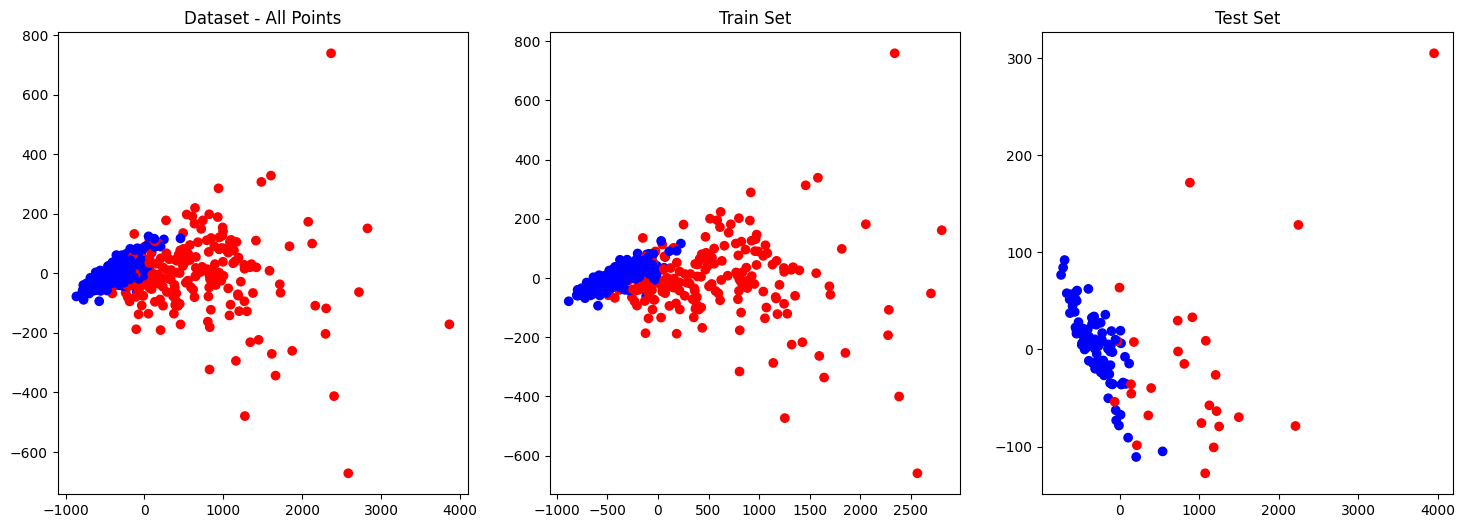

In [24]:
# Load Dataset and plot the Sets
dataset = np.genfromtxt("Processed Wisconsin Diagnostic Breast Cancer.csv",delimiter=",",skip_header=1)  # read the CSV file "simple_regression.csv" and make it np.array with skipping header
X = dataset[:,:-1] # take the samples
y = dataset[:,-1] # take the labels
y = np.where(y<=0,-1,1) # convert labels format to 1 or -1
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2,shuffle=False) # split the dataset for train and test
# plot the graph of points without SVM for each set
fig, axis = plt.subplots(1, 3,figsize=(18,6))
fig.subplots_adjust(wspace=0.2)
plot_high_dim_data(X,y,title='Dataset - All Points',pltAxis=axis[0]) 
plot_high_dim_data(X_trn,y_trn,title='Train Set',pltAxis=axis[1])
plot_high_dim_data(X_tst,y_tst,title='Test Set',pltAxis=axis[2])
plt.show()

In [25]:
# Grid Search for hyper parameters (it take while 5-6 mins)

kernels = ['rbf','poly','sigmoid']
C_List = [0.01, 0.1, 1, 10, 100]
gamma_List = [1e-3, 1e-2, 1e-1, 1, 10, 100,'auto', 'scale']
degree_List = [2, 3, 4, 5, 6, 7, 8, 9, 10,12,14,15]
scores_poly = {}
scores_rbf = {}
scores_sig = {}
for ker in kernels:
    for C in C_List:
        if ker == 'poly': # Grid search for Degree with C for polynomial kernel
            for degree in degree_List:
                try:
                    model = SVM(kernel=ker,degree=degree)
                    model.fit(X_trn,y_trn)
                    key = (f'{ker}',C,degree)
                    score = model.score(X_tst,y_tst)
                    scores_poly[key] = score
                    print(f'{key} : {score}')
                except:
                    continue
                
        elif ker == 'rbf': # Grid search for Gamma with C for RBF kernel
            for gamma in gamma_List:
                try:
                    model = SVM(kernel=ker,gamma=gamma)
                    model.fit(X_trn,y_trn)
                    key = (f'{ker}',C,gamma)
                    score = model.score(X_tst,y_tst)
                    scores_rbf[key] = score
                    print(f'{key} : {score}')
                except:
                    continue
                    
        elif ker == 'sigmoid': # Grid search for Gamma with C for Sigmoid kernel
            for gamma in gamma_List:
                try:
                    model = SVM(kernel=ker,gamma=gamma)
                    model.fit(X_trn,y_trn)
                    key = (f'{ker}',C,gamma)
                    score = model.score(X_tst,y_tst)
                    scores_sig[key] = score
                    print(f'{key} : {score}')
                except:
                    continue

# Grid search for Degree with Gamma for polynomial kernel

degree_List = [2, 3, 4, 5, 6, 7, 8, 9, 10,12,14,15]
scores_poly2 = {}

for degree in degree_List:
    for gamma in gamma_List:
        try:
            model = SVM(kernel='poly',degree=degree,gamma=gamma)
            model.fit(X_trn,y_trn)
            key = ('poly',gamma,degree)
            score = model.score(X_tst,y_tst)
            scores_poly2[key] = score
            print(f'{key} : {score}')
        except:
            continue

('rbf', 0.01, 0.001) : 0.7105263157894737
('rbf', 0.01, 0.01) : 0.7105263157894737
('rbf', 0.01, 0.1) : 0.7105263157894737
('rbf', 0.01, 1) : 0.7105263157894737
('rbf', 0.01, 10) : 0.7105263157894737
('rbf', 0.01, 100) : 0.7105263157894737
('rbf', 0.01, 'auto') : 0.7105263157894737
('rbf', 0.01, 'scale') : 0.7105263157894737
('rbf', 0.1, 0.001) : 0.7105263157894737
('rbf', 0.1, 0.01) : 0.7105263157894737
('rbf', 0.1, 0.1) : 0.7105263157894737
('rbf', 0.1, 1) : 0.7105263157894737
('rbf', 0.1, 10) : 0.7105263157894737
('rbf', 0.1, 100) : 0.7105263157894737
('rbf', 0.1, 'auto') : 0.7105263157894737
('rbf', 0.1, 'scale') : 0.7105263157894737
('rbf', 1, 0.001) : 0.7105263157894737
('rbf', 1, 0.01) : 0.7105263157894737
('rbf', 1, 0.1) : 0.7105263157894737
('rbf', 1, 1) : 0.7105263157894737
('rbf', 1, 10) : 0.7105263157894737
('rbf', 1, 100) : 0.7105263157894737
('rbf', 1, 'auto') : 0.7105263157894737
('rbf', 1, 'scale') : 0.7105263157894737
('rbf', 10, 0.001) : 0.7105263157894737
('rbf', 10,

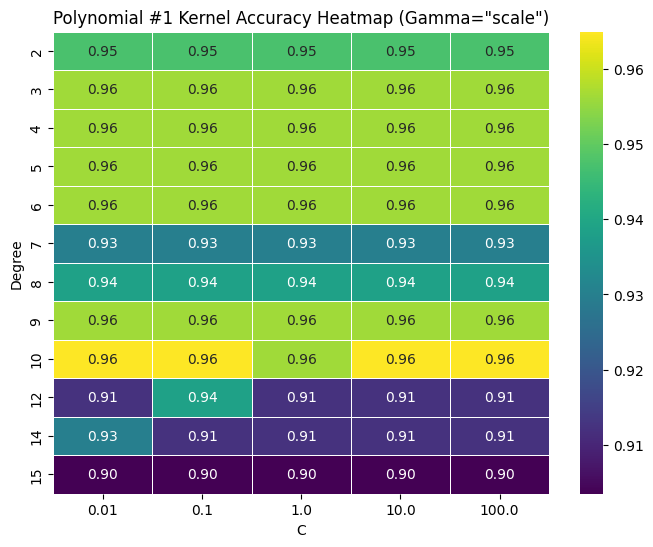

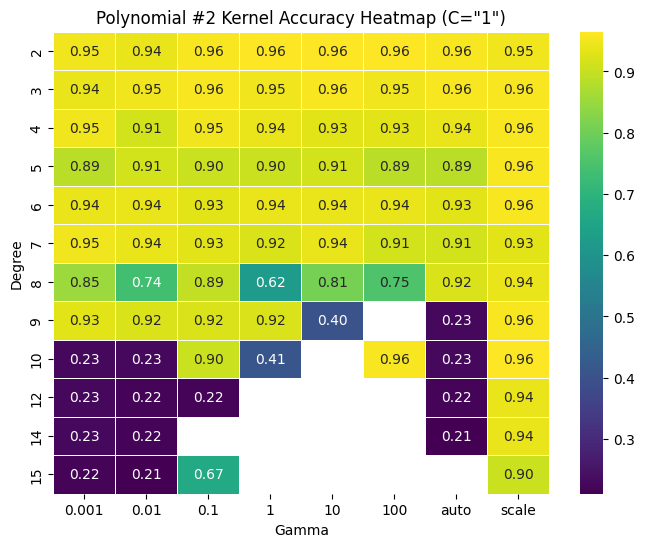

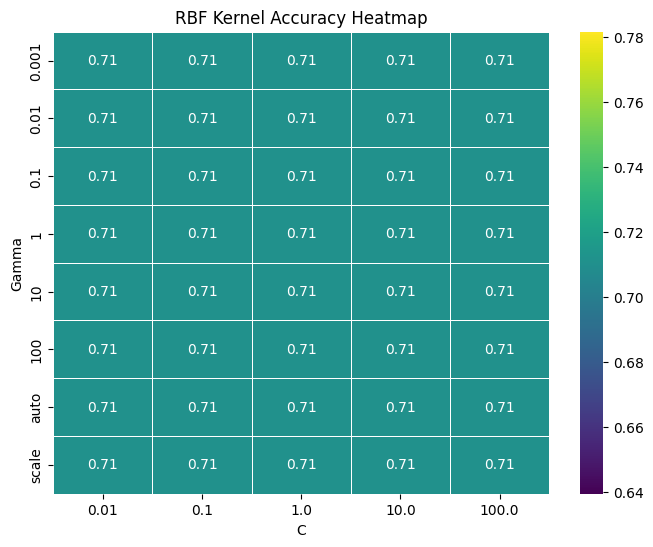

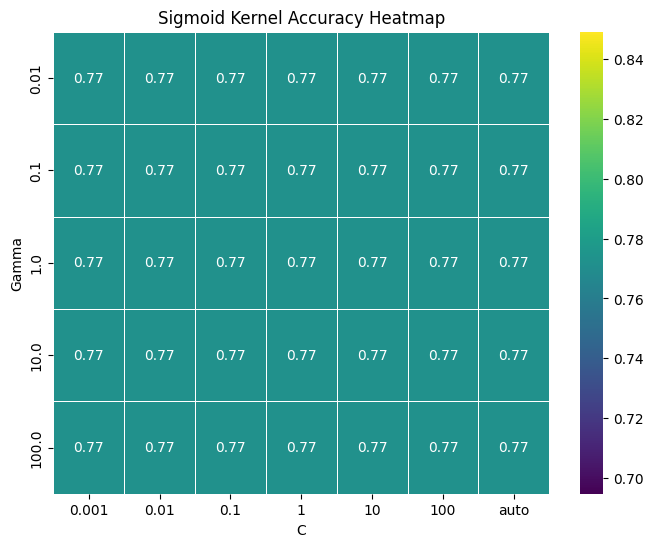

In [26]:
# Plot the results for analyze

# Create a DataFrame from the dictionaries
data_poly = pd.DataFrame(scores_poly.values(), index=scores_poly.keys(), columns=['Accuracy'])
data_poly[['Kernel', 'C', 'Degree']] = pd.DataFrame(data_poly.index.tolist(), index=data_poly.index)
data_poly = data_poly.reset_index(drop=True).drop(['Kernel'], axis=1)

data_poly2 = pd.DataFrame(scores_poly2.values(), index=scores_poly2.keys(), columns=['Accuracy'])
data_poly2[['Kernel', 'Gamma', 'Degree']] = pd.DataFrame(data_poly2.index.tolist(), index=data_poly2.index)
data_poly2 = data_poly2.reset_index(drop=True).drop(['Kernel'], axis=1)

data_rbf = pd.DataFrame(scores_rbf.values(), index=scores_rbf.keys(), columns=['Accuracy'])
data_rbf[['Kernel', 'C', 'Gamma']] = pd.DataFrame(data_rbf.index.tolist(), index=data_rbf.index)
data_rbf = data_rbf.reset_index(drop=True).drop(['Kernel'], axis=1)

data_sig = pd.DataFrame(scores_sig.values(), index=scores_sig.keys(), columns=['Accuracy'])
data_sig[['Kernel', 'C', 'Gamma']] = pd.DataFrame(data_sig.index.tolist(), index=data_sig.index)
data_sig = data_sig.reset_index(drop=True).drop(['Kernel'], axis=1)

# -------------- Polynomial Kernel --------------
heatmap_data = data_poly.pivot(index='Degree', columns='C', values='Accuracy') # Create a pivot table of scores

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", cbar=True, linewidths=0.5)
plt.xlabel('C')
plt.ylabel('Degree')
plt.title('Polynomial #1 Kernel Accuracy Heatmap (Gamma="scale")')
plt.show()
# -------------- Polynomial Kernel End --------------

# -------------- Polynomial 2 Kernel --------------
heatmap_data = data_poly2.pivot(index='Degree', columns='Gamma', values='Accuracy') # Create a pivot table of scores

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", cbar=True, linewidths=0.5)
plt.xlabel('Gamma')
plt.ylabel('Degree')
plt.title('Polynomial #2 Kernel Accuracy Heatmap (C="1")')
plt.show()
# -------------- Polynomial 2 Kernel End --------------


# -------------- RBF Kernel --------------
heatmap_data = data_rbf.pivot(index='Gamma', columns='C', values='Accuracy') # Create a pivot table of scores

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", cbar=True, linewidths=0.5)
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('RBF Kernel Accuracy Heatmap')
plt.show()
# -------------- RBF Kernel End --------------


# -------------- Sigmoid Kernel --------------
heatmap_data = data_sig.pivot(index='C', columns='Gamma', values='Accuracy') # Create a pivot table of scores

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", cbar=True, linewidths=0.5)
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Sigmoid Kernel Accuracy Heatmap')
plt.show()
# -------------- Sigmoid Kernel End --------------

**Conclusion:**
- RBF Kernel:
    - C and Gamma not effect on prediction
- Sigmoid Kernel:
    - C and Gamma not effect on prediction
- Polynomial Kernel:
    - I splited the Polynomial kernel grid Search to 2 Parts Degree with C and Degree with Gamma, for understandable graph and take less combinations to test.
    - In the first Test we can see from the Table:
        - It can be learned from the tables that polynomial kernel is the best choice from all of the kernels we tried
        - We can see that from 2 till 10 degrees we got great accuracy for all of the C values and above 10 we got good acurracy as well but lower
        - In Addition above 10 degrees the C parameter had effect on the accuracy but hard to understand how it effect and if there is a pattern
    - In the second Test we can see from the Table:
        - We can see from this plot that the most successful gamma is scale in the low degrees is not so much significant but while degrees increase
        the high gamma values is less good and in the high degrees even the model fails.
        - So scale the gamma is looking recommanded for this dataset.

From the information we have seen here that polynomial kernel is the most succesful kernel for predictions based on the parameters we tested.

**Note:** 
Because we used grid search for find the hyper parameters for wide scale of values
the Hyperparameters might be overfitted to the dataset.
In order to avoid this, we can also to do croos validation for better matching hyperparameters as well